We want to study the possibility of saving both energy and money with a different approach in terms of task management. To do so we'll make a couple of assumptions related to thermal distribution and power efficiency throughout the whole rack and nodes system.

In [1]:
# Importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import STL
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap

In [9]:
# Dataset import from CSV file -> each sample is in kWh
dataset_E = pd.read_csv('../E_Dataset.csv', index_col=0, parse_dates=True)
dataset_E

,r205n01,r205n02,r205n03,r205n04,r205n05,r205n06,r205n07,r205n08,r205n09,r205n10,...,r256n11,r256n12,r256n13,r256n14,r256n15,r256n16,r256n17,r256n18,r256n19,r256n20
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-05-02 17:00:00,0.530882,0.020000,0.529444,0.550606,0.577949,0.528611,0.568571,0.669487,0.574857,0.547297,...,0.512000,0.525294,0.530294,0.527838,0.521143,0.530286,0.526757,0.561316,0.539706,0.526000
2020-05-02 18:00:00,0.532026,0.020000,0.529043,0.548348,0.575651,0.527948,0.571402,0.667742,0.573163,0.546831,...,0.511357,0.527112,0.530397,0.527296,0.520332,0.530313,0.527160,0.562404,0.539750,0.524766
2020-05-02 19:00:00,0.541963,0.020000,0.532534,0.554684,0.581221,0.527630,0.571128,0.670140,0.573512,0.547244,...,0.511393,0.525655,0.530244,0.528171,0.520270,0.530186,0.525209,0.560955,0.537385,0.525631
2020-05-02 20:00:00,0.544268,0.020000,0.532655,0.557142,0.586214,0.529119,0.571604,0.674413,0.576784,0.547738,...,0.511757,0.527206,0.530570,0.527978,0.520716,0.530500,0.524167,0.560611,0.537646,0.525149
2020-05-02 21:00:00,0.542884,0.020000,0.533145,0.556479,0.587118,0.528839,0.572772,0.675122,0.576477,0.548337,...,0.512916,0.529028,0.530597,0.529075,0.522042,0.530186,0.527420,0.563308,0.539428,0.525097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-28 18:00:00,0.532970,0.541556,0.526485,0.550389,0.576043,0.520783,0.571000,0.549944,0.566535,0.535333,...,1.204111,0.841996,1.155944,1.583000,0.869056,1.193556,0.779056,0.745944,1.196444,1.255889
2022-09-28 19:00:00,0.533333,0.541111,0.527333,0.550611,0.577056,0.520333,0.567500,0.549333,0.567056,0.536278,...,1.205000,0.703944,1.173000,1.593167,0.868833,1.196000,0.670000,0.635778,1.201000,1.251611
2022-09-28 20:00:00,0.532556,0.541278,0.526556,0.548944,0.575722,0.520889,0.570000,0.550444,0.566167,0.535611,...,1.203944,0.863444,1.175167,1.587444,0.708833,1.195556,0.610889,0.902000,1.195222,1.245722


In [3]:
# Dataset import from CSV file
dataset_TEMP_in = pd.read_csv('../TemperatureDataset_inlet.csv', index_col=0, parse_dates=True)
dataset_TEMP_out = pd.read_csv('../TemperatureDataset_outlet.csv', index_col=0, parse_dates=True)

In [4]:
# Creation of individual nodes' datasets
dataset_TEMP_in_nodes = pd.DataFrame()
dataset_TEMP_in_mean_nodes = pd.Series()

dataset_TEMP_out_nodes = pd.DataFrame()
dataset_TEMP_out_mean_nodes = pd.Series()

for i in range(1, 21):
    if (i < 10):
        node_nbr = "n0" + str(i)
    else:
        node_nbr = "n" + str(i)
    node_in = [col for col in dataset_TEMP_in.columns if node_nbr in col]
    if not node_in:
        continue # Skipping a cycle if the node number isn't present
    new_node = dataset_TEMP_in[node_in].mean(axis=1)
    dataset_TEMP_in_nodes[node_nbr] = new_node
    dataset_TEMP_in_mean_nodes[node_nbr] = dataset_TEMP_in_nodes[node_nbr].mean()

for i in range(1, 21):
    if (i < 10):
        node_nbr = "n0" + str(i)
    else:
        node_nbr = "n" + str(i)
    node_out = [col for col in dataset_TEMP_out.columns if node_nbr in col]
    if not node_out:
        continue # Skipping a cycle if the node number isn't present
    new_node = dataset_TEMP_out[node_out].mean(axis=1)
    dataset_TEMP_out_nodes[node_nbr] = new_node
    dataset_TEMP_out_mean_nodes[node_nbr] = dataset_TEMP_out_nodes[node_nbr].mean()

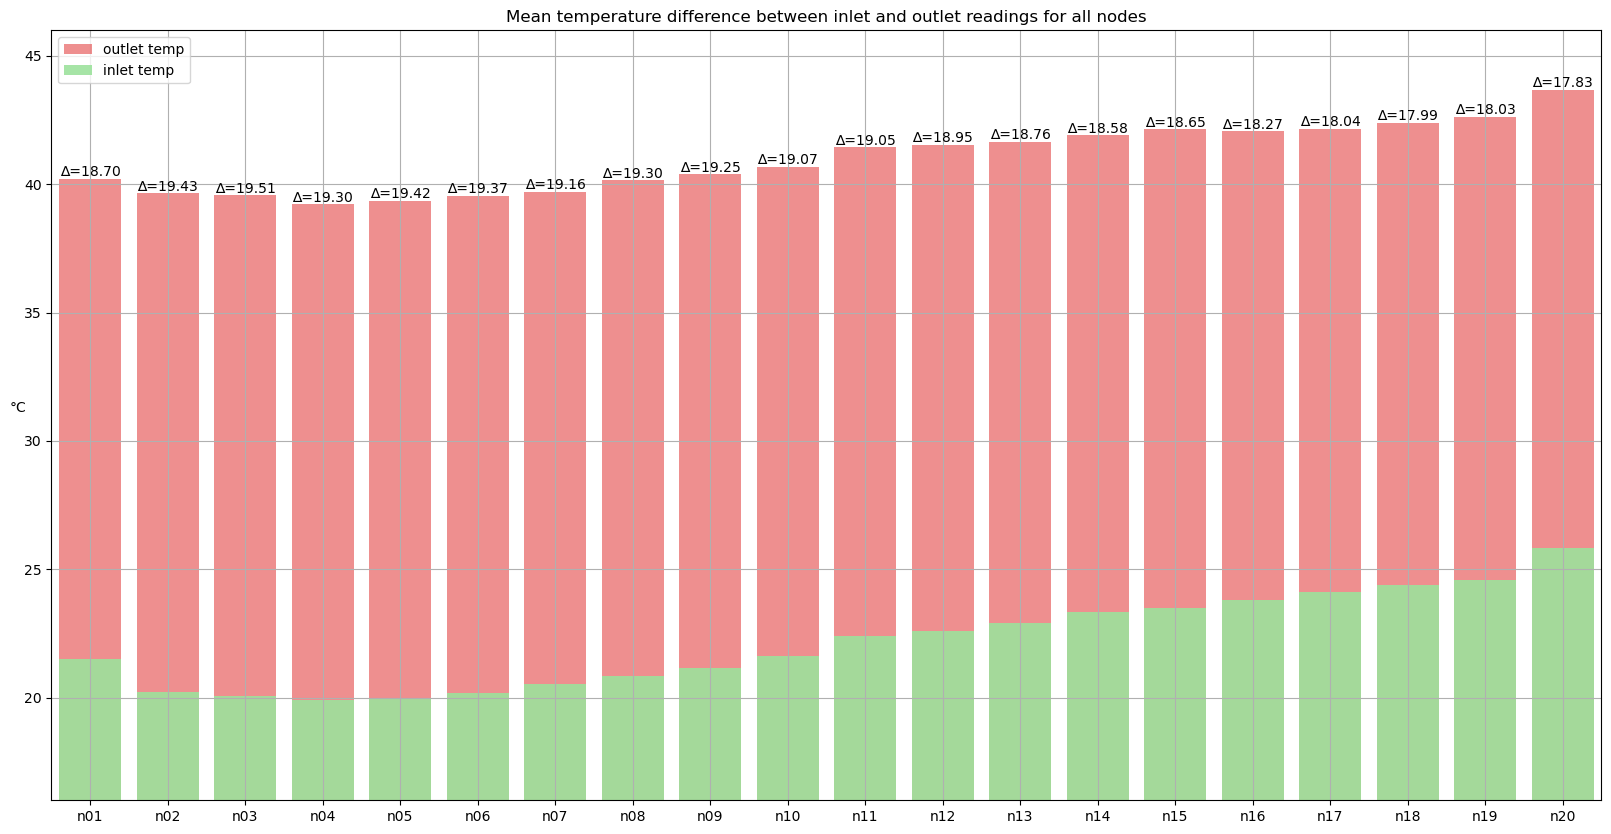

In [5]:
difference = dataset_TEMP_out_mean_nodes.values - dataset_TEMP_in_mean_nodes.values

# Temperature distance plotting
fig, ax = plt.subplots(figsize=(20,10))

# Creating a colormap
sns.barplot(x=dataset_TEMP_out_mean_nodes.index, y=dataset_TEMP_out_mean_nodes.values, ax=ax, color='red', alpha=0.5, label='outlet temp')
sns.barplot(x=dataset_TEMP_in_mean_nodes.index, y=dataset_TEMP_in_mean_nodes.values, ax=ax, color='lightgreen', alpha=0.9, label='inlet temp')

plt.grid(True)

plt.ylabel('°C', rotation=0)
plt.title("Mean temperature difference between inlet and outlet readings for all nodes")
plt.legend(loc=2)
ax.set_ylim(16, 46)

for i in range(len(dataset_TEMP_out_mean_nodes)):
    plt.text(i, dataset_TEMP_out_mean_nodes.iloc[i] + 0.1, f'∆={difference[i]:.2f}', ha='center')

#plt.savefig('../PLOTS/TEMP_difference_plot.png', dpi=300)
plt.show()

The difference in terms of input and output temperature doesn't change that much between nodes, for this (and others) reason we assume that the distribution of work throughout the nodes is more or less balanced; this means that a different approach in work assignment might actually positively impact the overall power consumption. (Subtracting work from higher nodes and assigning it to lower nodes might be helpful)

To further prove this assumption we can see a very low standard deviation in the array that contains the difference between inlet and output temperature for each node.

In [6]:
difference = pd.Series(difference)
difference.describe()

count    20.000000
mean     18.834106
std       0.547412
min      17.834951
25%      18.504014
50%      19.002736
75%      19.298619
max      19.511229
dtype: float64

c:\Users\loren\miniconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\loren\miniconda3\envs\DeepLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


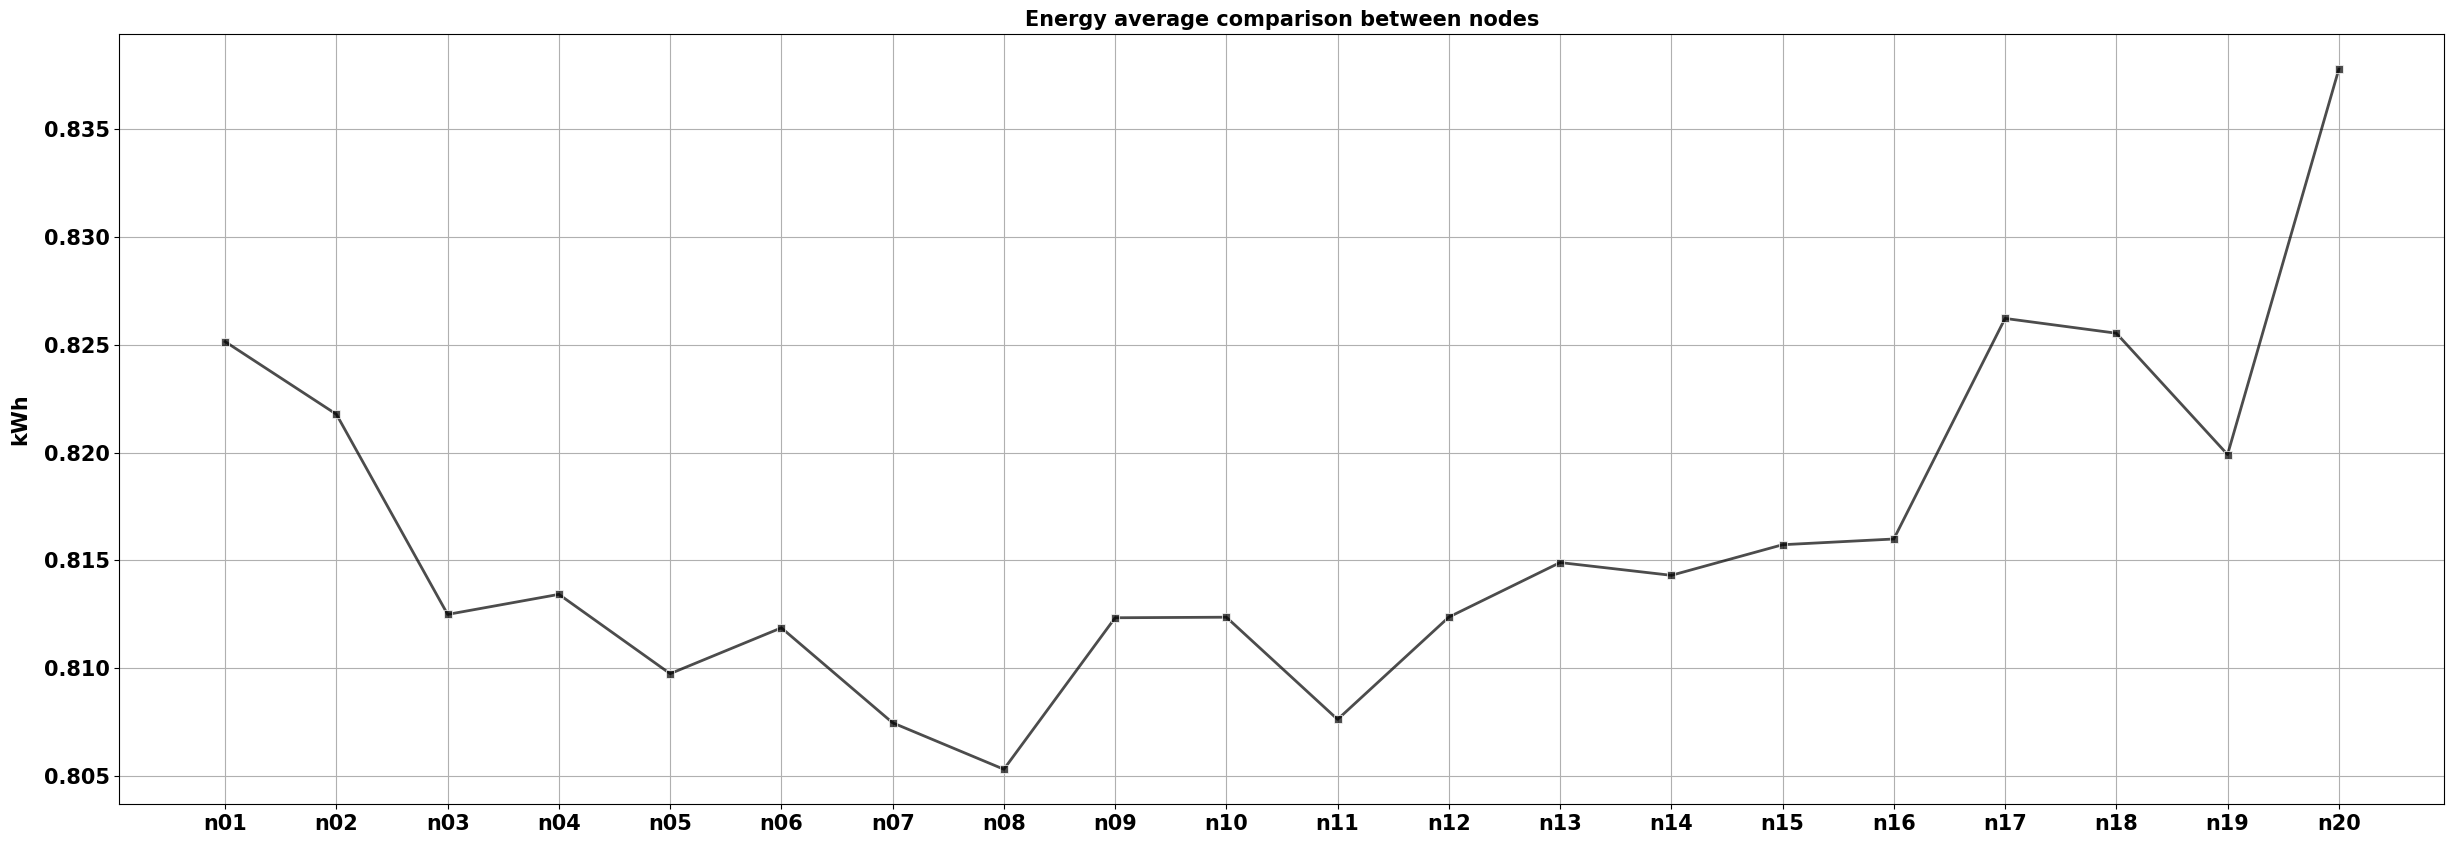

In [13]:
# Creation of individual nodes' dataset and plotting as a lineplot
dataset_E_nodes = pd.DataFrame()
dataset_E_mean_nodes = pd.Series()

for i in range(1, 21):
    if (i < 10):
        node_nbr = "n0" + str(i)
    else:
        node_nbr = "n" + str(i)
    node = [col for col in dataset_E.columns if node_nbr in col]
    if not node:
        continue # Skipping a cycle if the node number isn't present
    new_node = dataset_E[node].mean(axis=1)
    dataset_E_nodes[node_nbr] = new_node
    dataset_E_mean_nodes[node_nbr] = dataset_E_nodes[node_nbr].mean()

fig, ax = plt.subplots(figsize=(30,10))

sns.lineplot(data=dataset_E_mean_nodes, ax=ax, c='black', linewidth=2, alpha=0.7, marker='s')
plt.grid(True)
plt.gca().yaxis.labelpad = 10
plt.xticks(fontweight='bold', fontsize=15)
plt.yticks(fontweight='bold', fontsize=15)
plt.ylabel('kWh', fontweight='bold', fontsize=15)
plt.title("Energy average comparison between nodes", fontweight='bold', fontsize=15)
ax.set_ylim()

#plt.savefig('../PLOTS/PWR_nodes_mean_plot.png', dpi=300)
plt.show()